# Project: Income (per person) Data Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction


The income per person of a country is a measure of how much money is earned by an individual. This is used as an indicator of the living conditions and quality of life in that country ([Investopedia](https://www.investopedia.com/terms/i/income-per-capita.asp)).
Many different variables can be related to the income amount of an area. The data selected to this analysis is provided by [Gapminder World](https://www.gapminder.org/data/), and it is composed by four main indicators.
1. **Mean years at school**
   * The average number of years of school attended by men and women 25 years and older. 
   
   *Assumption: This analysis considers that men and women older than 25 years old represent the biggest portion of the work force of a country.*
   

2. **Employment by sector**
   * This indicator is composed of three sectors, which are: Agriculture, Industry and Service. For every sector there's the percentage of all employment that works in that sector for each country.


3. **Employment by status**
   * The status includes three categories, which are: Family workers, Salaried workers and Self-employed workers. For every status there's the percentage of all employment that works that way for each country.
   
   
4. **Income**
   * Income per person, which is calculated by: $\frac{Gross Domestic Product}{Country Population}$
   
The data is available in csv format. The `employment by sector` and `employment by status` indicators are provided in files separated by the categories. Also, the `mean years in school` is divided considering male and female data.

This analysis intends to look for correlations among the indicators and the income per person in a country. In order to achieve this objective, there are some questions that will guide this study:
1. *Does the mean years spent by the population of a country  in school is related to its income?*
2. *How the percentage of workers per employment sector is related to the income in a country?*
3. *How the percentage of workers per employment status is related to the income in a country?*
4. *Is there a correlation between the mean years in school and the employment sector proportions?*
5. *Is there a correlation between the mean years in school and the employment status proportions?*
6. *Is there a correlation between the employment sector and the employment status?*

In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.


The data in Gapminder is provided separately by each indicator.

In [3]:
income = pd.read_csv('data/income_per_person_gdppercapita_ppp_inflation_adjusted.csv')

men_mean_yrs_school = pd.read_csv('data/mean_years_in_school_men_25_years_and_older.csv')
women_mean_yrs_school = pd.read_csv('data/mean_years_in_school_women_25_years_and_older.csv')

agriculture = pd.read_csv('data/agriculture_workers_percent_of_employment.csv')
industry = pd.read_csv('data/industry_workers_percent_of_employment.csv')
service = pd.read_csv('data/service_workers_percent_of_employment.csv')

family = pd.read_csv('data/family_workers_percent_of_employment.csv')
self_employed = pd.read_csv('data/self_employed_percent_of_employment.csv')
salaried = pd.read_csv('data/salaried_workers_percent_of_non_agricultural_employment.csv')

The first step will be understanding how the data is structured

In [4]:
income.head()

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2031,2032,2033,2034,2035,2036,2037,2038,2039,2040
0,Afghanistan,603,603,603,603,603,603,603,603,603,...,2420,2470,2520,2580,2640,2700,2760,2820,2880,2940
1,Albania,667,667,667,667,667,668,668,668,668,...,18500,18900,19300,19700,20200,20600,21100,21500,22000,22500
2,Algeria,715,716,717,718,719,720,721,722,723,...,15600,15900,16300,16700,17000,17400,17800,18200,18600,19000
3,Andorra,1200,1200,1200,1200,1210,1210,1210,1210,1220,...,73200,74800,76400,78100,79900,81600,83400,85300,87200,89100
4,Angola,618,620,623,626,628,631,634,637,640,...,6270,6410,6550,6700,6850,7000,7150,7310,7470,7640


In [5]:
men_mean_yrs_school.head()

,country,1970,1971,1972,1973,1974,1975,1976,1977,1978,...,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009
0,Afghanistan,0.7,0.7,0.8,0.8,0.8,0.9,0.9,0.9,1.0,...,2.1,2.1,2.2,2.3,2.3,2.4,2.4,2.5,2.6,2.6
1,Albania,5.1,5.2,5.3,5.5,5.6,5.7,5.9,6.0,6.1,...,9.1,9.2,9.4,9.5,9.6,9.8,9.9,10.0,10.1,10.2
2,Algeria,0.9,0.9,1.0,1.1,1.1,1.2,1.2,1.3,1.4,...,3.7,3.8,3.9,4.0,4.1,4.3,4.4,4.5,4.6,4.7
3,Angola,1.4,1.5,1.5,1.6,1.7,1.7,1.8,1.9,2.0,...,4.0,4.1,4.3,4.4,4.5,4.6,4.7,4.9,5.0,5.1
4,Antigua and Barbuda,7.0,7.1,7.2,7.4,7.5,7.6,7.8,7.9,8.1,...,11.0,11.1,11.2,11.3,11.4,11.5,11.5,11.6,11.7,11.8


### Changing the shape

Every indicator is one different csv file, so there's a column to the country and one row for each value. For every year there's a column, and depending on the indicator there are different number of years.

To make the dataframes more consistent and more appropriated to inspect the data it's better reshaping them. So, them will look like it:

| country    | year    | value  |
| -----------|:-------:| -----:|
| Brazil     | 1900 | 0.7 |
| Brazil     | 1901 | 0.8 |
| Canada     | 1900 | 0.75 |
| Germany | 1900    | 0.9 |

Firstly, I will change the income DataFrame to check how it looks.

In [6]:
income.shape

(193, 242)

Searching a bit on Google, I found the pandas function `melt`, which I can use to reshape the data.

In [7]:
income = income.melt(id_vars=['country'], var_name='year', value_name='income')

In [8]:
income.head()

,country,year,income
0,Afghanistan,1800,603
1,Albania,1800,667
2,Algeria,1800,715
3,Andorra,1800,1200
4,Angola,1800,618


In [9]:
income.shape

(46513, 3)

Since this is the way I want the DataFrames to be, so I will do the same change to the other dfs.

In [10]:
# Change the mean years in school data.
men_mean_yrs_school = men_mean_yrs_school.melt(id_vars=['country'], var_name='year', value_name='mean_years')
women_mean_yrs_school = women_mean_yrs_school.melt(id_vars=['country'], var_name='year', value_name='mean_years')

# Change the employment sector data.
agriculture = agriculture.melt(id_vars=['country'], var_name='year', value_name='agriculture_workers_perc')
industry = industry.melt(id_vars=['country'], var_name='year', value_name='industry_workers_perc')
service = service.melt(id_vars=['country'], var_name='year', value_name='service_workers_perc')

# Change the employment status data.
family = family.melt(id_vars=['country'], var_name='year', value_name='family_workers_perc')
salaried = salaried.melt(id_vars=['country'], var_name='year', value_name='salaried_workers_perc')
self_employed = self_employed.melt(id_vars=['country'], var_name='year', value_name='self_employed_workers_perc')

In [11]:
men_mean_yrs_school.head()

,country,year,mean_years
0,Afghanistan,1970,0.7
1,Albania,1970,5.1
2,Algeria,1970,0.9
3,Angola,1970,1.4
4,Antigua and Barbuda,1970,7.0


In [12]:
agriculture.head()

,country,year,agriculture_workers_perc
0,Afghanistan,1970,NaN
1,Albania,1970,NaN
2,Algeria,1970,NaN
3,Angola,1970,NaN
4,Antigua and Barbuda,1970,NaN


### Inspecting data

Even after this transformation, the data for each indicator is split in different DataFrames, so to perform the  analysis it would be really repetitive to inspect nine dfs searching for inconsistences. Also, the different data frames for the same indicator just represents that the indicator has different categories. For example, the employment by sector has three different classes of sectors.

I will perform some inspections on the data to garantee that even the categories for the indicators are ok, and then merge the data to make the analysis more consistent.

Now that all the data frames are in the same format, I will procede inspecting the data.

#### Income data

In [13]:
income.shape

(46513, 3)

In [14]:
income.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46513 entries, 0 to 46512
Data columns (total 3 columns):
country    46513 non-null object
year       46513 non-null object
income     46513 non-null int64
dtypes: int64(1), object(2)
memory usage: 1.1+ MB


In [15]:
sum(income.duplicated())

0

In [16]:
income.nunique()

country     193
year        241
income     2379
dtype: int64

In [17]:
income.isna().sum()

country    0
year       0
income     0
dtype: int64

As we can see above, the data for income indicator is really complete. There's no duplicated or missing values. Also, the data type is appropriated to the analysis.

#### Mean years at school

In [18]:
men_mean_yrs_school.shape

(6960, 3)

In [19]:
women_mean_yrs_school.shape

(6960, 3)

In [20]:
men_mean_yrs_school.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6960 entries, 0 to 6959
Data columns (total 3 columns):
country       6960 non-null object
year          6960 non-null object
mean_years    6960 non-null float64
dtypes: float64(1), object(2)
memory usage: 163.2+ KB


In [21]:
women_mean_yrs_school.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6960 entries, 0 to 6959
Data columns (total 3 columns):
country       6960 non-null object
year          6960 non-null object
mean_years    6960 non-null float64
dtypes: float64(1), object(2)
memory usage: 163.2+ KB


In [22]:
men_mean_yrs_school.duplicated().sum()

0

In [23]:
women_mean_yrs_school.duplicated().sum()

0

In [24]:
men_mean_yrs_school.isna().sum()

country       0
year          0
mean_years    0
dtype: int64

In [25]:
women_mean_yrs_school.isna().sum()

country       0
year          0
mean_years    0
dtype: int64

In [26]:
men_mean_yrs_school.country.unique().all() == women_mean_yrs_school.country.unique().all()

True

In [27]:
men_mean_yrs_school.year.unique().all() == women_mean_yrs_school.year.unique().all()

True

The `mean years in school` for both genders is very consistent. The data don't have missing values and duplicates. Furthermore, the number of values for each column, and the values for country and years are the same, which shows that men and women data have values for the same period of time and region.

#### Employment by sector

In [28]:
agriculture.shape

(8448, 3)

In [29]:
industry.shape

(8448, 3)

In [30]:
service.shape

(8448, 3)

In [31]:
agriculture.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8448 entries, 0 to 8447
Data columns (total 3 columns):
country                     8448 non-null object
year                        8448 non-null object
agriculture_workers_perc    3470 non-null float64
dtypes: float64(1), object(2)
memory usage: 198.1+ KB


In [32]:
industry.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8448 entries, 0 to 8447
Data columns (total 3 columns):
country                  8448 non-null object
year                     8448 non-null object
industry_workers_perc    3534 non-null float64
dtypes: float64(1), object(2)
memory usage: 198.1+ KB


In [33]:
service.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8448 entries, 0 to 8447
Data columns (total 3 columns):
country                 8448 non-null object
year                    8448 non-null object
service_workers_perc    3534 non-null float64
dtypes: float64(1), object(2)
memory usage: 198.1+ KB


In [34]:
agriculture.duplicated().sum()

0

In [35]:
industry.duplicated().sum()

0

In [36]:
service.duplicated().sum()

0

In [37]:
agriculture.isna().sum()

country                        0
year                           0
agriculture_workers_perc    4978
dtype: int64

In [38]:
industry.isna().sum()

country                     0
year                        0
industry_workers_perc    4914
dtype: int64

In [39]:
service.isna().sum()

country                    0
year                       0
service_workers_perc    4914
dtype: int64

In [40]:
agriculture.nunique()

country                      176
year                          48
agriculture_workers_perc    1295
dtype: int64

In [41]:
industry.nunique()

country                  176
year                      48
industry_workers_perc    495
dtype: int64

In [42]:
service.nunique()

country                 176
year                     48
service_workers_perc    665
dtype: int64

In [43]:
agriculture.country.unique().all() == industry.country.unique().all() == service.country.unique().all()

True

In [44]:
agriculture.year.unique().all() == industry.year.unique().all() == service.year.unique().all()

True

As shown above, the data for the `employment by sector` indicator have some missing values. However, the countries and years presented in the three DataFrames are the same.

#### Employment by status

In [45]:
family.shape

(8208, 3)

In [46]:
salaried.shape

(9940, 3)

In [47]:
self_employed.shape

(5728, 3)

In [48]:
family.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8208 entries, 0 to 8207
Data columns (total 3 columns):
country                8208 non-null object
year                   8208 non-null object
family_workers_perc    2473 non-null float64
dtypes: float64(1), object(2)
memory usage: 192.5+ KB


In [49]:
salaried.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9940 entries, 0 to 9939
Data columns (total 3 columns):
country                  9940 non-null object
year                     9940 non-null object
salaried_workers_perc    1760 non-null float64
dtypes: float64(1), object(2)
memory usage: 233.0+ KB


In [50]:
self_employed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5728 entries, 0 to 5727
Data columns (total 3 columns):
country                       5728 non-null object
year                          5728 non-null object
self_employed_workers_perc    5728 non-null float64
dtypes: float64(1), object(2)
memory usage: 134.3+ KB


In [51]:
family.duplicated().sum()

0

In [52]:
salaried.duplicated().sum()

0

In [53]:
self_employed.duplicated().sum()

0

In [54]:
family.isna().sum()

country                   0
year                      0
family_workers_perc    5735
dtype: int64

In [55]:
salaried.isna().sum()

country                     0
year                        0
salaried_workers_perc    8180
dtype: int64

In [56]:
self_employed.isna().sum()

country                       0
year                          0
self_employed_workers_perc    0
dtype: int64

In [57]:
family.nunique()

country                171
year                    48
family_workers_perc    896
dtype: int64

In [58]:
salaried.nunique()

country                  142
year                      70
salaried_workers_perc    461
dtype: int64

In [59]:
self_employed.nunique()

country                        179
year                            32
self_employed_workers_perc    1130
dtype: int64

In [60]:
family.country.unique().all() == salaried.country.unique().all() == self_employed.country.unique().all()

True

In [61]:
family.year.unique().all() == salaried.year.unique().all() == self_employed.year.unique().all()

False

The data for the `employment by status` is not as consistent as the other indicators. There is different number of years and countries for each category. Also, there're null values for the categories `family` and `salaried`, but no category has duplicated values.

> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).

### Data Cleaning (Replace this with more specific notes!)

In [62]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.

In [63]:
income.year = income.year.astype(int)

---
The data for mean years in school has the same years and countries to both men and womem. So, it's a good idea to merge them in a single DataFrame and use `groupby()` or `query()` during the analysis if we need to see some data sepatared.

In [64]:
men_mean_yrs_school.rename(columns={'mean_years': 'men_mean'}, inplace=True)
women_mean_yrs_school.rename(columns={'mean_years': 'women_mean'}, inplace=True)

In [65]:
men_mean_yrs_school.head(2)

,country,year,men_mean
0,Afghanistan,1970,0.7
1,Albania,1970,5.1


In [66]:
women_mean_yrs_school.head(2)

,country,year,women_mean
0,Afghanistan,1970,0.0
1,Albania,1970,3.9


In [67]:
mean_years_in_school = men_mean_yrs_school.merge(women_mean_yrs_school, how='inner')

In [68]:
mean_years_in_school.head()

,country,year,men_mean,women_mean
0,Afghanistan,1970,0.7,0.0
1,Albania,1970,5.1,3.9
2,Algeria,1970,0.9,0.6
3,Angola,1970,1.4,0.5
4,Antigua and Barbuda,1970,7.0,7.0


In [69]:
mean_years_in_school.year = mean_years_in_school.year.astype(int)

In [70]:
mean_years_in_school.shape

(6960, 4)

---

The data for employment by sector has the same years and countries. However, it has different number for `Null` values. As the first step, I'm going to clean these values and them check if it's possible to merge the DataFrames in the same way I did previously with the mean_years_in_school.

In [71]:
agriculture.dropna(axis=0, inplace=True)

In [72]:
agriculture.shape

(3470, 3)

In [73]:
agriculture.isna().sum()

country                     0
year                        0
agriculture_workers_perc    0
dtype: int64

In [74]:
industry.dropna(axis=0, inplace=True)

In [75]:
industry.shape

(3534, 3)

In [76]:
industry.isna().sum()

country                  0
year                     0
industry_workers_perc    0
dtype: int64

In [77]:
service.dropna(axis=0, inplace=True)

In [78]:
service.shape

(3534, 3)

In [79]:
service.isna().sum()

country                 0
year                    0
service_workers_perc    0
dtype: int64

In [80]:
agriculture.nunique()

country                      176
year                          48
agriculture_workers_perc    1295
dtype: int64

In [81]:
industry.nunique()

country                  176
year                      48
industry_workers_perc    495
dtype: int64

In [82]:
service.nunique()

country                 176
year                     48
service_workers_perc    665
dtype: int64

In [83]:
agriculture.country.unique().all() == industry.country.unique().all() == service.country.unique().all()

True

In [84]:
agriculture.year.unique().all() == industry.year.unique().all() == service.year.unique().all()

True

In [85]:
agr = agriculture.groupby('country', as_index=False).count()
ind = industry.groupby('country', as_index=False).count()
ser = service.groupby('country', as_index=False).count()

In [86]:
agr.drop(columns=['year'], inplace=True)
ind.drop(columns=['year'], inplace=True)
ser.drop(columns=['year'], inplace=True)

In [87]:
print(agr.shape)
print(ind.shape)
print(ser.shape)

(176, 2)
(176, 2)
(176, 2)


---
**Começando a junção dos DFs com 1 coluna**

In [88]:
agriculture_2 = agriculture.copy()
industry_2 = industry.copy()
service_2 = service.copy()

In [89]:
agr_sector = np.repeat('agriculture', agriculture.shape[0])
ind_sector = np.repeat('industry', industry.shape[0])
serv_sector = np.repeat('service', service.shape[0])

In [90]:
agriculture['sector'] = agr_sector
industry['sector'] = ind_sector
service['sector'] = serv_sector

In [91]:
agriculture.head(2)

,country,year,agriculture_workers_perc,sector
7,Australia,1970,8.04,agriculture
15,Belgium,1970,4.86,agriculture


In [92]:
industry.head(2)

,country,year,industry_workers_perc,sector
7,Australia,1970,36.4,industry
15,Belgium,1970,42.2,industry


In [93]:
service.head(2)

,country,year,service_workers_perc,sector
7,Australia,1970,55.8,service
15,Belgium,1970,53.0,service


In [94]:
agriculture.rename(columns={'agriculture_workers_perc': 'workers_percent'}, inplace=True)
industry.rename(columns={'industry_workers_perc': 'workers_percent'}, inplace=True)
service.rename(columns={'service_workers_perc': 'workers_percent'}, inplace=True)

In [95]:
all_sector = agriculture.append(industry).append(service)

In [96]:
all_sector.head()

,country,year,workers_percent,sector
7,Australia,1970,8.04,agriculture
15,Belgium,1970,4.86,agriculture
29,Canada,1970,7.48,agriculture
33,China,1970,80.80,agriculture
48,Egypt,1970,51.10,agriculture


In [97]:
all_sector.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10538 entries, 7 to 8444
Data columns (total 4 columns):
country            10538 non-null object
year               10538 non-null object
workers_percent    10538 non-null float64
sector             10538 non-null object
dtypes: float64(1), object(3)
memory usage: 411.6+ KB


In [98]:
all_sector.year = all_sector.year.astype(int)

---
**Fazendo a segunda opção**

In [99]:
agriculture_2.head()

,country,year,agriculture_workers_perc
7,Australia,1970,8.04
15,Belgium,1970,4.86
29,Canada,1970,7.48
33,China,1970,80.80
48,Egypt,1970,51.10


In [100]:
sector_2 = agriculture_2.merge(industry_2, on=['country', 'year'], how='outer')
sector_2 = sector_2.merge(service_2, on=['country', 'year'], how='outer')

In [101]:
sector_2.head()

,country,year,agriculture_workers_perc,industry_workers_perc,service_workers_perc
0,Australia,1970,8.04,36.4,55.80
1,Belgium,1970,4.86,42.2,53.00
2,Canada,1970,7.48,31.5,61.00
3,China,1970,80.80,10.2,9.01
4,Egypt,1970,51.10,18.5,30.10


In [102]:
sector_2.shape

(3560, 5)

In [103]:
sector_2.isna().sum()

country                      0
year                         0
agriculture_workers_perc    90
industry_workers_perc       26
service_workers_perc        26
dtype: int64

In [104]:
sector_2.year = sector_2.year.astype(int)

---

The data for employment by status has different years and countries, and `Null` values for each status. As the first step, I'm going to clean the DataFrames separately and them check if it's possible to merge the DataFrames in the same way I did previously with the mean_years_in_school.

In [105]:
family.dropna(axis=0, inplace=True)

In [106]:
family.shape

(2473, 3)

In [107]:
family.isna().sum()

country                0
year                   0
family_workers_perc    0
dtype: int64

In [108]:
salaried.dropna(axis=0, inplace=True)

In [109]:
salaried.shape

(1760, 3)

In [110]:
salaried.isna().sum()

country                  0
year                     0
salaried_workers_perc    0
dtype: int64

In [111]:
self_employed.dropna(axis=0, inplace=True)

In [112]:
self_employed.shape

(5728, 3)

In [113]:
self_employed.isna().sum()

country                       0
year                          0
self_employed_workers_perc    0
dtype: int64

---
**Começando opção 1**

In [114]:
family_2 = family.copy()
salaried_2 = salaried.copy()
self_employed_2 = self_employed.copy()

In [115]:
fam_status = np.repeat('family', family.shape[0])
sal_status = np.repeat('salaried', salaried.shape[0])
self_status = np.repeat('self_employed', self_employed.shape[0])

In [116]:
family['status'] = fam_status
salaried['status'] = sal_status
self_employed['status'] = self_status

In [117]:
status = family.append(salaried, ignore_index=True, sort=False).append(self_employed, ignore_index=True, sort=False)

In [118]:
status.head(2)

,country,year,family_workers_perc,status,salaried_workers_perc,self_employed_workers_perc
0,South Korea,1970,26.90,family,NaN,NaN
1,United States,1970,1.27,family,NaN,NaN


In [119]:
status.shape

(9961, 6)

In [120]:
status.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9961 entries, 0 to 9960
Data columns (total 6 columns):
country                       9961 non-null object
year                          9961 non-null object
family_workers_perc           2473 non-null float64
status                        9961 non-null object
salaried_workers_perc         1760 non-null float64
self_employed_workers_perc    5728 non-null float64
dtypes: float64(3), object(3)
memory usage: 467.0+ KB


In [121]:
status.year = status.year.astype(int)

---
**Começando opção 2**

In [122]:
status_2 = family_2.merge(salaried_2, on=['country', 'year'], how='outer')
status_2 = status_2.merge(self_employed_2, on=['country', 'year'], how='outer')

In [123]:
status_2.head()

,country,year,family_workers_perc,salaried_workers_perc,self_employed_workers_perc
0,South Korea,1970,26.90,NaN,NaN
1,United States,1970,1.27,92.4,NaN
2,South Korea,1971,26.40,NaN,NaN
3,United States,1971,1.26,92.3,NaN
4,South Korea,1972,27.20,NaN,NaN


In [124]:
status_2.shape

(6048, 5)

In [125]:
status.isna().sum()

country                          0
year                             0
family_workers_perc           7488
status                           0
salaried_workers_perc         8201
self_employed_workers_perc    4233
dtype: int64

In [126]:
status_2.year = status_2.year.astype(int)

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### Does the mean years spent by the population of a country  in school is related to its income?

In [159]:
income.describe()

,year,income
count,46513.000000,46513.000000
mean,1920.000000,6392.946467
std,69.570856,13446.715240
min,1800.000000,247.000000
25%,1860.000000,917.000000
50%,1920.000000,1640.000000
75%,1980.000000,4800.000000
max,2040.000000,182000.000000


In [167]:
income.query('year >= 1970 and year < 2018').describe()

,year,income
count,9264.000000,9264.000000
mean,1993.500000,13442.096179
std,13.854147,18096.074820
min,1970.000000,247.000000
25%,1981.750000,2400.000000
50%,1993.500000,6835.000000
75%,2005.250000,17000.000000
max,2017.000000,178000.000000


In [127]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.

mean_years_in_school.describe()

,year,men_mean,women_mean
count,6960.000000,6960.000000,6960.000000
mean,1989.500000,6.131422,5.013851
std,11.544226,3.232696,3.607734
min,1970.000000,0.200000,0.000000
25%,1979.750000,3.400000,1.700000
50%,1989.500000,5.900000,4.600000
75%,1999.250000,8.600000,7.900000
max,2009.000000,14.200000,14.200000


In [128]:
income.describe()

,year,income
count,46513.000000,46513.000000
mean,1920.000000,6392.946467
std,69.570856,13446.715240
min,1800.000000,247.000000
25%,1860.000000,917.000000
50%,1920.000000,1640.000000
75%,1980.000000,4800.000000
max,2040.000000,182000.000000


As shown above, the min and max years are: 1970 and 2009, respectively. For the income data there is more years, because there's a prediction for the years to come yet. To analyse this data I will select only the years present in both of them.

In [129]:
income_years_in_school = income.query('year >= 1970 and year < 2010')

In [130]:
income_years_in_school.describe()

,year,income
count,7720.000000,7720.000000
mean,1989.500000,12700.804534
std,11.544144,17819.730873
min,1970.000000,247.000000
25%,1979.750000,2260.000000
50%,1989.500000,6190.000000
75%,1999.250000,15600.000000
max,2009.000000,178000.000000


In [131]:
mean_years_in_school_2 = mean_years_in_school.merge(income_years_in_school, on=['country', 'year'], how='inner')

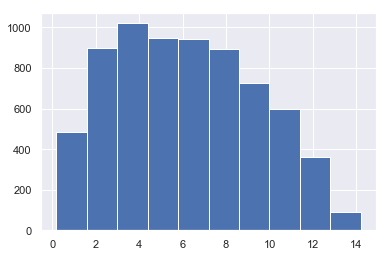

In [132]:
mean_years_in_school_2.men_mean.hist()

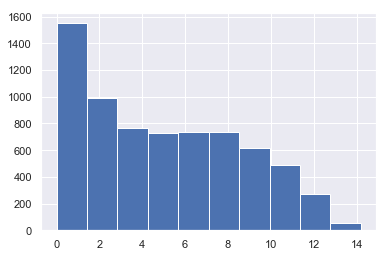

In [133]:
mean_years_in_school_2.women_mean.hist()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


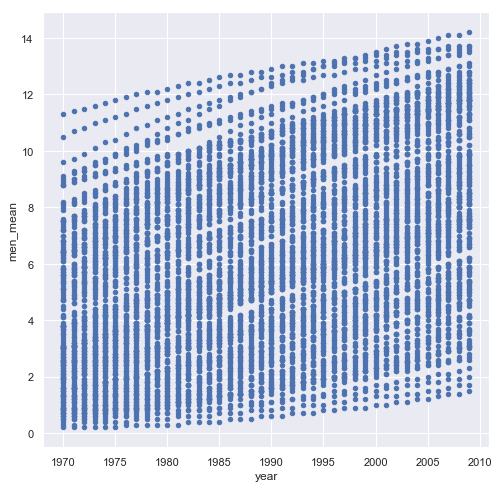

In [134]:
mean_years_in_school_2.plot(x='year', y='men_mean', kind='scatter', figsize=(8,8))

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


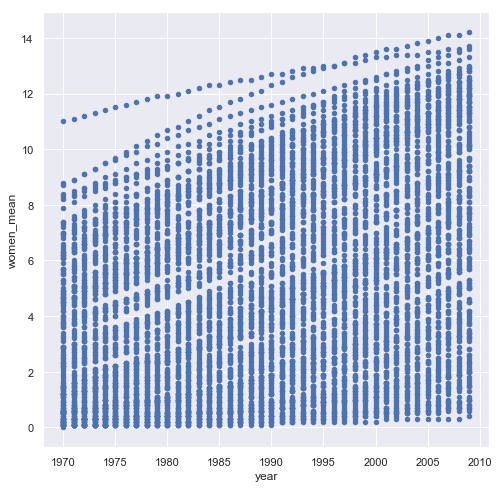

In [135]:
mean_years_in_school_2.plot(x='year', y='women_mean', kind='scatter', figsize=(8,8))

In [136]:
mean_years_in_school_2.describe()

,year,men_mean,women_mean,income
count,6960.000000,6960.000000,6960.000000,6960.000000
mean,1989.500000,6.131422,5.013851,11867.990805
std,11.544226,3.232696,3.607734,16972.557018
min,1970.000000,0.200000,0.000000,247.000000
25%,1979.750000,3.400000,1.700000,2150.000000
50%,1989.500000,5.900000,4.600000,5945.000000
75%,1999.250000,8.600000,7.900000,14600.000000
max,2009.000000,14.200000,14.200000,178000.000000


In [137]:
bin_edges = [0,2,4,6,8,10,12,14.2]
bin_names = ['0-2', '2-4', '4-6', '6-8', 
             '8-10', '10-12', '12-14']

mean_years_in_school_2['men_bin'] = pd.cut(mean_years_in_school_2['men_mean'], bin_edges, labels=bin_names)
mean_years_in_school_2['women_bin'] = pd.cut(mean_years_in_school_2['women_mean'], bin_edges, labels=bin_names)
mean_years_in_school_2.head()

,country,year,men_mean,women_mean,income,men_bin,women_bin
0,Afghanistan,1970,0.7,0.0,1180,0-2,NaN
1,Albania,1970,5.1,3.9,3830,4-6,2-4
2,Algeria,1970,0.9,0.6,7290,0-2,0-2
3,Angola,1970,1.4,0.5,5550,0-2,0-2
4,Antigua and Barbuda,1970,7.0,7.0,5620,6-8,6-8


In [138]:
grouped_data = mean_years_in_school_2.groupby('country').mean()
grouped_data.head()

,year,men_mean,women_mean,income
country,,,,
Afghanistan,1989.5,1.5675,0.1700,1136.40
Albania,1989.5,7.6800,6.4800,5016.25
Algeria,1989.5,2.5775,2.0300,10057.50
Angola,1989.5,3.0600,1.3525,4378.00
Antigua and Barbuda,1989.5,9.5775,9.7600,13691.75


In [139]:
grouped_data['men_bin'] = pd.cut(grouped_data['men_mean'], bin_edges, labels=bin_names)
grouped_data['women_bin'] = pd.cut(grouped_data['women_mean'], bin_edges, labels=bin_names)
grouped_data.head()

,year,men_mean,women_mean,income,men_bin,women_bin
country,,,,,,
Afghanistan,1989.5,1.5675,0.1700,1136.40,0-2,0-2
Albania,1989.5,7.6800,6.4800,5016.25,6-8,6-8
Algeria,1989.5,2.5775,2.0300,10057.50,2-4,2-4
Angola,1989.5,3.0600,1.3525,4378.00,2-4,0-2
Antigua and Barbuda,1989.5,9.5775,9.7600,13691.75,8-10,8-10


In [140]:
count_data = grouped_data.groupby('men_bin', as_index=False).count()

In [141]:
count_data

,men_bin,year,men_mean,women_mean,income,women_bin
0,0-2,15,15,15,15,15
1,2-4,35,35,35,35,35
2,4-6,42,42,42,42,42
3,6-8,27,27,27,27,27
4,8-10,38,38,38,38,38
5,10-12,14,14,14,14,14
6,12-14,3,3,3,3,3


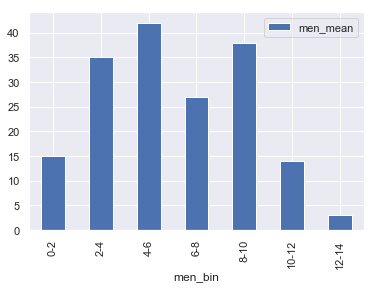

In [142]:
count_data.plot(x='men_bin', y='men_mean', kind='bar')

In [143]:
count_data = grouped_data.groupby('women_bin', as_index=False).count()
count_data

,women_bin,year,men_mean,women_mean,income,men_bin
0,0-2,43,43,43,43,43
1,2-4,33,33,33,33,33
2,4-6,28,28,28,28,28
3,6-8,27,27,27,27,27
4,8-10,31,31,31,31,31
5,10-12,11,11,11,11,11
6,12-14,1,1,1,1,1


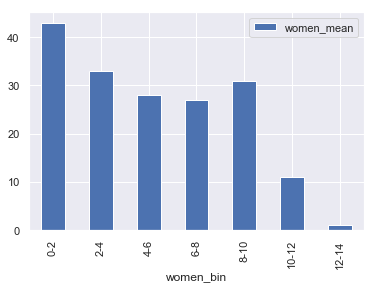

In [144]:
count_data.plot(x='women_bin', y='women_mean', kind='bar')

Now that we unsderstand more abou the mean years in school data, let's explore more about the relation between income and mean years in school.

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


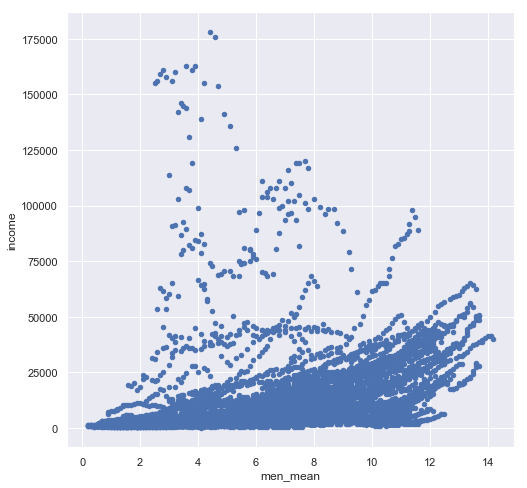

In [145]:
mean_years_in_school_2.plot(x='men_mean', y='income', kind='scatter', figsize=(8,8))

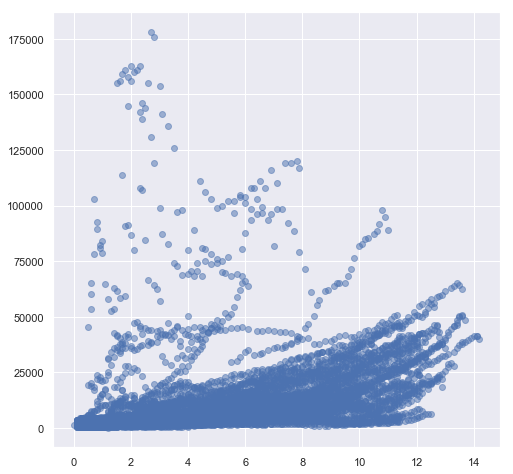

In [146]:
plt.figure(figsize=(8,8))
plt.scatter(mean_years_in_school_2.women_mean, mean_years_in_school_2.income, alpha=0.5)

In [147]:
mean_years_in_school_2.describe()

,year,men_mean,women_mean,income
count,6960.000000,6960.000000,6960.000000,6960.000000
mean,1989.500000,6.131422,5.013851,11867.990805
std,11.544226,3.232696,3.607734,16972.557018
min,1970.000000,0.200000,0.000000,247.000000
25%,1979.750000,3.400000,1.700000,2150.000000
50%,1989.500000,5.900000,4.600000,5945.000000
75%,1999.250000,8.600000,7.900000,14600.000000
max,2009.000000,14.200000,14.200000,178000.000000


In order to analyse the mean years in school, I will create three diferent ranges for income:

* **Poverty**: below the 25 percentile
* **Low**: between the 25 and 50 percentile
* **Middle**: between the 50 and 75 percentile
* **High:** above the 75 percentile

In [168]:
bin_edges = [247, 2400, 6835, 17000, 178000]
bin_names = ['Poverty', 'Low', 'Middle', 'High']

mean_years_in_school_2['income_range'] = pd.cut(mean_years_in_school_2['income'], bin_edges, labels=bin_names)
mean_years_in_school_2.head()

,country,year,men_mean,women_mean,income,men_bin,women_bin,income_range
0,Afghanistan,1970,0.7,0.0,1180,0-2,NaN,Poverty
1,Albania,1970,5.1,3.9,3830,4-6,2-4,Low
2,Algeria,1970,0.9,0.6,7290,0-2,0-2,Middle
3,Angola,1970,1.4,0.5,5550,0-2,0-2,Low
4,Antigua and Barbuda,1970,7.0,7.0,5620,6-8,6-8,Low


In [169]:
income_groups = mean_years_in_school_2.groupby('income_range').mean()
income_groups

,year,men_mean,women_mean,income
income_range,,,,
Poverty,1988.643335,3.296912,1.798147,1420.020072
Low,1988.485857,5.533001,4.267998,4273.460899
Middle,1989.609954,7.325116,6.532060,11072.523148
High,1991.720539,9.179057,8.362828,35692.592593


### How the percentage of workers for employment sector is related to the income in a country?

In [150]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.


In [151]:
all_sector.head()

,country,year,workers_percent,sector
7,Australia,1970,8.04,agriculture
15,Belgium,1970,4.86,agriculture
29,Canada,1970,7.48,agriculture
33,China,1970,80.80,agriculture
48,Egypt,1970,51.10,agriculture


In [152]:
all_sector.groupby('sector').describe()

year                                                          \
              count         mean        std     min     25%     50%     75%   
sector                                                                        
agriculture  3470.0  1998.497695  12.514408  1970.0  1990.0  2000.0  2009.0   
industry     3534.0  1998.379174  12.460454  1970.0  1989.0  2000.0  2009.0   
service      3534.0  1998.379174  12.460454  1970.0  1989.0  2000.0  2009.0   

                    workers_percent                                            \
                max           count       mean        std   min     25%   50%   
sector                                                                          
agriculture  2017.0          3470.0  19.862176  18.725528  0.05   4.820  13.0   
industry     2017.0          3534.0  24.680017   8.368895  2.05  19.125  23.9   
service      2017.0          3534.0  54.693415  15.981599  5.59  44.000  57.1   

                           
                75%   max  
sector                     
agriculture  30.475  92.2  
industry     30.300  59.6  
service      67.100  89.8

In [153]:
sector_2.head()

,country,year,agriculture_workers_perc,industry_workers_perc,service_workers_perc
0,Australia,1970,8.04,36.4,55.80
1,Belgium,1970,4.86,42.2,53.00
2,Canada,1970,7.48,31.5,61.00
3,China,1970,80.80,10.2,9.01
4,Egypt,1970,51.10,18.5,30.10


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


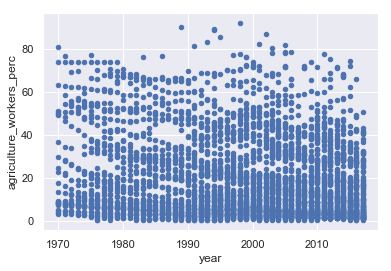

In [196]:
sector_2.plot(x='year', y='agriculture_workers_perc', kind='scatter')

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


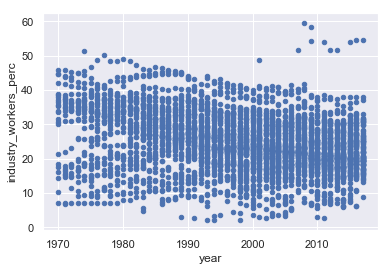

In [197]:
sector_2.plot(x='year', y='industry_workers_perc', kind='scatter')

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


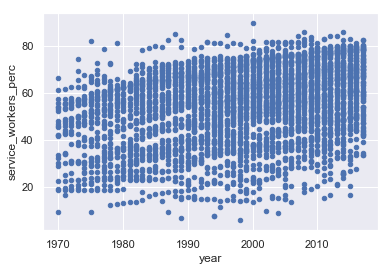

In [199]:
sector_2.plot(x='year', y='service_workers_perc', kind='scatter')

In [154]:
sector_2.describe()

,year,agriculture_workers_perc,industry_workers_perc,service_workers_perc
count,3560.000000,3470.000000,3534.000000,3534.000000
mean,1998.326124,19.862176,24.680017,54.693415
std,12.500861,18.725528,8.368895,15.981599
min,1970.000000,0.050000,2.050000,5.590000
25%,1989.000000,4.820000,19.125000,44.000000
50%,2000.000000,13.000000,23.900000,57.100000
75%,2009.000000,30.475000,30.300000,67.100000
max,2017.000000,92.200000,59.600000,89.800000


In [155]:
sector_2[sector_2['agriculture_workers_perc'] == 92.2]

,country,year,agriculture_workers_perc,industry_workers_perc,service_workers_perc
1492,Burundi,1998,92.2,2.2,5.59


In [156]:
sector_2 = sector_2.merge(income, on=['country', 'year'], how='inner')

In [158]:
sector_2.describe()

,year,agriculture_workers_perc,industry_workers_perc,service_workers_perc,income
count,3548.000000,3458.000000,3522.000000,3522.000000,3548.000000
mean,1998.284949,19.926923,24.657575,54.649725,19214.454059
std,12.500273,18.725649,8.373688,15.990917,16733.031136
min,1970.000000,0.050000,2.050000,5.590000,549.000000
25%,1989.000000,4.862500,19.100000,43.925000,6847.500000
50%,2000.000000,13.000000,23.900000,57.000000,14400.000000
75%,2009.000000,30.600000,30.300000,67.000000,27600.000000
max,2017.000000,92.200000,59.600000,89.800000,129000.000000


In [187]:
bin_edges = [247, 2400, 6835, 17000, 178000]
bin_names = ['Poverty', 'Low', 'Middle', 'High']

sector_2['income_range'] = pd.cut(sector_2['income'], bin_edges, labels=bin_names)
sector_2.head()

,country,year,agriculture_workers_perc,industry_workers_perc,service_workers_perc,income,income_range
0,Australia,1970,8.04,36.4,55.80,19700,High
1,Belgium,1970,4.86,42.2,53.00,18900,High
2,Canada,1970,7.48,31.5,61.00,19900,High
3,China,1970,80.80,10.2,9.01,851,Poverty
4,Egypt,1970,51.10,18.5,30.10,3020,Low


In [195]:
sector_2.query('year >= 2005 and year < 2016 and country == "Brazil"').groupby('income_range').median()

,year,agriculture_workers_perc,industry_workers_perc,service_workers_perc,income
income_range,,,,,
Poverty,NaN,NaN,NaN,NaN,NaN
Low,NaN,NaN,NaN,NaN,NaN
Middle,2010.0,16.1,22.15,61.75,14250.0
High,NaN,NaN,NaN,NaN,NaN


In [192]:
sector_2.query('year >= 2005 and year < 2016 and country == "China"').groupby('income_range').median()

,year,agriculture_workers_perc,industry_workers_perc,service_workers_perc,income
income_range,,,,,
Poverty,NaN,NaN,NaN,NaN,NaN
Low,2005.5,43.7,24.5,31.8,6065.0
Middle,2011.0,34.8,29.3,35.7,10400.0
High,NaN,NaN,NaN,NaN,NaN


In [172]:
sector_2.groupby('income_range').mean()

,year,agriculture_workers_perc,industry_workers_perc,service_workers_perc,income
income_range,,,,,
Poverty,1996.979695,55.694315,13.205533,29.039391,1659.355330
Low,1995.342525,37.705196,19.530190,41.395335,4535.994194
Middle,1999.113697,20.287729,25.239883,53.488240,11387.099373
High,1999.164401,6.539667,28.007178,64.724624,33657.799353


In [191]:
sector_2.query('year == 2015').groupby('income_range').median()

,year,agriculture_workers_perc,industry_workers_perc,service_workers_perc,income
income_range,,,,,
Poverty,2015,62.30,9.11,26.50,1380
Low,2015,31.70,21.35,48.75,4725
Middle,2015,17.90,20.30,56.10,11800
High,2015,4.08,22.70,69.70,34200


In [189]:
sector_2.query('year >= 2005 and year < 2016').groupby('income_range').median()

,year,agriculture_workers_perc,industry_workers_perc,service_workers_perc,income
income_range,,,,,
Poverty,2010,52.90,9.11,31.1,1820
Low,2010,35.40,19.35,43.8,4580
Middle,2010,19.60,21.30,55.0,11000
High,2010,4.21,23.65,69.5,32100


In [173]:
sector_2.groupby('income_range').median()

,year,agriculture_workers_perc,industry_workers_perc,service_workers_perc,income
income_range,,,,,
Poverty,1999,60.10,11.6,25.0,1770
Low,1997,39.50,19.4,38.6,4410
Middle,2000,19.20,24.0,54.5,11100
High,2002,4.89,27.5,65.5,30100


### How the percentage of workers for employment status is related to the income in a country?

In [150]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.


In [174]:
status.head()

,country,year,family_workers_perc,status,salaried_workers_perc,self_employed_workers_perc
0,South Korea,1970,26.90,family,NaN,NaN
1,United States,1970,1.27,family,NaN,NaN
2,South Korea,1971,26.40,family,NaN,NaN
3,United States,1971,1.26,family,NaN,NaN
4,South Korea,1972,27.20,family,NaN,NaN


In [176]:
status.groupby('status').describe()

year                                                   \
                count         mean        std     min      25%     50%   
status                                                                   
family         2473.0  2003.576223   8.982270  1970.0  1997.00  2004.0   
salaried       1760.0  2004.021591  10.598818  1948.0  1998.00  2006.0   
self_employed  5728.0  2006.500000   9.233899  1991.0  1998.75  2006.5   

                               family_workers_perc            ...  \
                   75%     max               count      mean  ...   
status                                                        ...   
family         2011.00  2017.0              2473.0  6.666822  ...   
salaried       2012.00  2017.0                 0.0       NaN  ...   
self_employed  2014.25  2022.0                 0.0       NaN  ...   

              salaried_workers_perc       self_employed_workers_perc  \
                                75%   max                      count   
status                                                                 
family                          NaN   NaN                        0.0   
salaried                       90.2  99.6                        0.0   
self_employed                   NaN   NaN                     5728.0   

                                                                    
                    mean        std    min   25%   50%   75%   max  
status                                                              
family               NaN        NaN    NaN   NaN   NaN   NaN   NaN  
salaried             NaN        NaN    NaN   NaN   NaN   NaN   NaN  
self_employed  43.342911  26.283148  0.403  19.1  39.8  64.9  95.1  

[3 rows x 32 columns]

In [177]:
status_2.head()

,country,year,family_workers_perc,salaried_workers_perc,self_employed_workers_perc
0,South Korea,1970,26.90,NaN,NaN
1,United States,1970,1.27,92.4,NaN
2,South Korea,1971,26.40,NaN,NaN
3,United States,1971,1.26,92.3,NaN
4,South Korea,1972,27.20,NaN,NaN


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


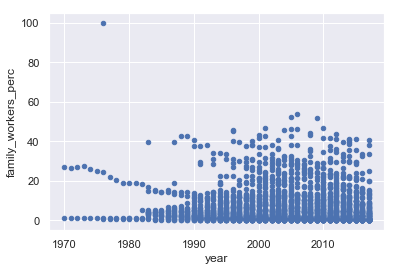

In [200]:
status_2.plot(x='year', y='family_workers_perc', kind='scatter')

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


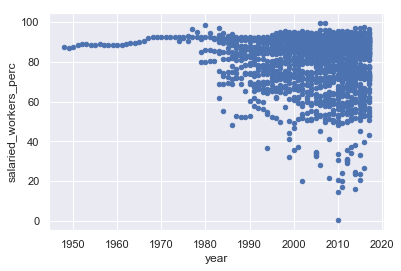

In [201]:
status_2.plot(x='year', y='salaried_workers_perc', kind='scatter')

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


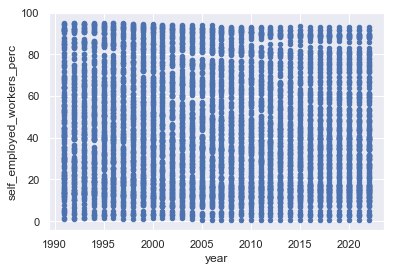

In [202]:
status_2.plot(x='year', y='self_employed_workers_perc', kind='scatter')

In [178]:
status.describe()

,year,family_workers_perc,salaried_workers_perc,self_employed_workers_perc
count,9961.000000,2473.000000,1760.000000,5728.000000
mean,2005.336211,6.666822,80.052591,43.342911
std,9.525979,9.203392,13.780193,26.283148
min,1948.000000,0.000000,0.261000,0.403000
25%,1998.000000,0.840000,72.600000,19.100000
50%,2006.000000,2.650000,85.100000,39.800000
75%,2013.000000,8.820000,90.200000,64.900000
max,2022.000000,100.000000,99.600000,95.100000


In [180]:
status_2[status_2['family_workers_perc'] == 100]

,country,year,family_workers_perc,salaried_workers_perc,self_employed_workers_perc
13,Samoa,1976,100.0,NaN,NaN


In [181]:
status_2 = status_2.merge(income, on=['country', 'year'], how='inner')

In [182]:
status_2.describe()

,year,family_workers_perc,salaried_workers_perc,self_employed_workers_perc,income
count,6040.000000,2473.000000,1752.000000,5728.000000,6040.000000
mean,2005.407285,6.666822,79.983596,43.342911,15657.089570
std,10.426205,9.203392,13.773631,26.283148,18506.558255
min,1948.000000,0.000000,0.261000,0.403000,247.000000
25%,1997.000000,0.840000,72.600000,19.100000,2780.000000
50%,2006.000000,2.650000,85.050000,39.800000,8610.000000
75%,2014.000000,8.820000,90.100000,64.900000,22325.000000
max,2022.000000,100.000000,99.600000,95.100000,129000.000000


In [183]:
bin_edges = [247, 2400, 6835, 17000, 178000]
bin_names = ['Poverty', 'Low', 'Middle', 'High']

status_2['income_range'] = pd.cut(status_2['income'], bin_edges, labels=bin_names)
status_2.head()

,country,year,family_workers_perc,salaried_workers_perc,self_employed_workers_perc,income,income_range
0,South Korea,1970,26.90,NaN,NaN,2080,Poverty
1,United States,1970,1.27,92.4,NaN,23900,High
2,South Korea,1971,26.40,NaN,NaN,2360,Poverty
3,United States,1971,1.26,92.3,NaN,24400,High
4,South Korea,1972,27.20,NaN,NaN,2680,Low


In [184]:
status_2.groupby('income_range').mean()

,year,family_workers_perc,salaried_workers_perc,self_employed_workers_perc,income
income_range,,,,,
Poverty,2004.498478,22.082576,46.450943,75.445830,1463.480974
Low,2004.746942,14.880923,65.727551,55.678422,4324.434251
Middle,2005.971024,6.956810,75.833750,33.933598,11208.886027
High,2006.047210,1.957545,86.399375,17.267053,37329.291845


In [185]:
status_2.groupby('income_range').median()

,year,family_workers_perc,salaried_workers_perc,self_employed_workers_perc,income
income_range,,,,,
Poverty,2004,20.30,41.3,77.4,1470
Low,2004,12.20,64.2,55.2,4200
Middle,2006,4.45,75.7,33.7,10800
High,2008,0.95,87.6,15.1,32100


In [203]:
status_2.query('year >= 2005 and year < 2016').groupby('income_range').median()

,year,family_workers_perc,salaried_workers_perc,self_employed_workers_perc,income
income_range,,,,,
Poverty,2010,21.350,32.5,79.75,1460
Low,2010,13.000,62.6,55.40,4165
Middle,2010,5.975,74.1,34.40,11000
High,2010,0.740,87.5,15.10,33900


### Is there a correlation between mean years in school and the employment sector proportions?

In [229]:
mean_2000_2010 = mean_years_in_school_2.query('year >= 2000 and year < 2010')
sector_2000_2010 = sector_2.query('year >= 2000 and year < 2010')

In [230]:
mean_2000_2010.head(2)

,country,year,men_mean,women_mean,income,men_bin,women_bin,income_range
5220,Afghanistan,2000,2.1,0.2,972,2-4,0-2,Poverty
5221,Albania,2000,9.1,8.0,5470,8-10,6-8,Low


In [231]:
sector_2000_2010.head(2)

,country,year,agriculture_workers_perc,industry_workers_perc,service_workers_perc,income,income_range
1664,Albania,2000,71.80,6.65,21.5,5470,Low
1665,Argentina,2000,0.67,22.70,76.2,14900,Middle


In [232]:
years_and_sector = mean_2000_2010.merge(sector_2000_2010,
                                        on=['country', 'year', 'income', 'income_range'], how='inner')

In [233]:
years_and_sector.head()

,country,year,men_mean,women_mean,income,men_bin,women_bin,income_range,agriculture_workers_perc,industry_workers_perc,service_workers_perc
0,Albania,2000,9.1,8.0,5470,8-10,6-8,Low,71.80,6.65,21.5
1,Argentina,2000,8.9,9.1,14900,8-10,8-10,Middle,0.67,22.70,76.2
2,Australia,2000,11.3,10.9,35300,10-12,10-12,High,4.86,21.60,73.5
3,Austria,2000,11.3,10.2,38800,10-12,10-12,High,6.05,30.00,63.9
4,Azerbaijan,2000,11.1,9.9,4460,10-12,8-10,Low,41.00,10.90,48.1


In [237]:
years_and_sector.query('year == 2000').groupby('women_bin').median()

,year,men_mean,women_mean,income,agriculture_workers_perc,industry_workers_perc,service_workers_perc
women_bin,,,,,,,
0-2,2000,4.20,1.70,3500,48.400,18.00,33.50
2-4,2000,5.35,3.20,5630,36.350,17.65,39.35
4-6,2000,6.35,5.35,6235,38.900,19.95,45.95
6-8,2000,7.50,6.90,8840,13.400,23.70,55.95
8-10,2000,9.45,9.10,13600,15.700,21.70,62.10
10-12,2000,11.30,10.95,23450,6.695,26.80,62.20
12-14,2000,12.95,12.55,39850,3.090,24.75,73.50


In [236]:
years_and_sector.query('year == 2002').groupby('women_bin').median()

,year,men_mean,women_mean,income,agriculture_workers_perc,industry_workers_perc,service_workers_perc
women_bin,,,,,,,
0-2,2002,3.90,1.70,3520,44.40,20.10,35.50
2-4,2002,5.35,3.45,5815,34.50,20.45,40.15
4-6,2002,6.90,5.50,6120,42.40,20.60,39.30
6-8,2002,7.60,6.60,10200,14.90,22.50,60.10
8-10,2002,9.20,9.10,11400,15.60,22.40,62.00
10-12,2002,11.40,11.05,18700,7.92,25.65,61.55
12-14,2002,13.10,12.70,42600,3.21,23.20,74.30


### Is there a correlation between mean years in school and the employment status (proportions?)

In [238]:
mean_2000_2010 = mean_years_in_school_2.query('year >= 2000 and year < 2010')
status_2000_2010 = status_2.query('year >= 2000 and year < 2010')

In [239]:
mean_2000_2010.head(2)

,country,year,men_mean,women_mean,income,men_bin,women_bin,income_range
5220,Afghanistan,2000,2.1,0.2,972,2-4,0-2,Poverty
5221,Albania,2000,9.1,8.0,5470,8-10,6-8,Low


In [242]:
mean_2000_2010.isna().sum()

country         0
year            0
men_mean        0
women_mean      0
income          0
men_bin         0
women_bin       0
income_range    0
dtype: int64

In [240]:
status_2000_2010.head(2)

,country,year,family_workers_perc,salaried_workers_perc,self_employed_workers_perc,income,income_range
789,Argentina,2000,1.15,72.4,27.6,14900,Middle
790,Australia,2000,0.85,NaN,20.0,35300,High


In [243]:
status_2000_2010.isna().sum()

country                          0
year                             0
family_workers_perc            885
salaried_workers_perc         1189
self_employed_workers_perc      13
income                           0
income_range                     0
dtype: int64

In [244]:
years_and_status = mean_2000_2010.merge(status_2000_2010,
                                        on=['country', 'year', 'income', 'income_range'], how='inner')

In [245]:
years_and_status.head()

,country,year,men_mean,women_mean,income,men_bin,women_bin,income_range,family_workers_perc,salaried_workers_perc,self_employed_workers_perc
0,Afghanistan,2000,2.1,0.2,972,2-4,0-2,Poverty,NaN,NaN,79.2
1,Albania,2000,9.1,8.0,5470,8-10,6-8,Low,NaN,NaN,68.8
2,Algeria,2000,3.7,3.0,10200,2-4,2-4,Middle,NaN,NaN,39.3
3,Angola,2000,4.0,1.9,3510,2-4,0-2,Low,NaN,NaN,66.9
4,Argentina,2000,8.9,9.1,14900,8-10,8-10,Middle,1.15,72.4,27.6


In [246]:
years_and_status.query('year == 2000').groupby('women_bin').median()

,year,men_mean,women_mean,income,family_workers_perc,salaried_workers_perc,self_employed_workers_perc
women_bin,,,,,,,
0-2,2000,2.85,1.10,1425,21.40,62.50,77.80
2-4,2000,5.25,3.00,2505,13.30,56.05,67.05
4-6,2000,6.40,5.30,6345,12.30,60.90,42.20
6-8,2000,7.50,6.75,7675,2.56,80.95,37.50
8-10,2000,9.80,9.10,10600,2.45,73.90,31.80
10-12,2000,11.30,10.90,15700,1.29,90.05,18.50
12-14,2000,12.95,12.55,39850,0.39,90.40,11.80


In [247]:
years_and_status.query('year == 2002').groupby('women_bin').median()

,year,men_mean,women_mean,income,family_workers_perc,salaried_workers_perc,self_employed_workers_perc
women_bin,,,,,,,
0-2,2002,3.00,1.20,1430,29.900,36.25,81.60
2-4,2002,5.00,3.10,2590,18.650,NaN,65.20
4-6,2002,6.70,5.10,6050,12.300,80.00,53.10
6-8,2002,7.70,6.60,10400,3.100,74.60,31.50
8-10,2002,9.45,9.15,9895,2.565,72.00,33.35
10-12,2002,11.40,11.00,16900,1.700,89.90,18.10
12-14,2002,13.10,12.70,42600,0.370,88.10,12.40


### Is there a correlation between mean years in school and the employment status (proportions?)

In [248]:
sector_2000_2010 = sector_2.query('year >= 2000 and year < 2010')
status_2000_2010 = status_2.query('year >= 2000 and year < 2010')

In [249]:
sector_2000_2010.head(2)

,country,year,agriculture_workers_perc,industry_workers_perc,service_workers_perc,income,income_range
1664,Albania,2000,71.80,6.65,21.5,5470,Low
1665,Argentina,2000,0.67,22.70,76.2,14900,Middle


In [251]:
status_2000_2010.head(2)

,country,year,family_workers_perc,salaried_workers_perc,self_employed_workers_perc,income,income_range
789,Argentina,2000,1.15,72.4,27.6,14900,Middle
790,Australia,2000,0.85,NaN,20.0,35300,High


In [252]:
sector_and_status = sector_2000_2010.merge(status_2000_2010,
                                        on=['country', 'year', 'income', 'income_range'], how='inner')

In [253]:
sector_and_status.head()

,country,year,agriculture_workers_perc,industry_workers_perc,service_workers_perc,income,income_range,family_workers_perc,salaried_workers_perc,self_employed_workers_perc
0,Albania,2000,71.80,6.65,21.5,5470,Low,NaN,NaN,68.8
1,Argentina,2000,0.67,22.70,76.2,14900,Middle,1.15,72.4,27.6
2,Australia,2000,4.86,21.60,73.5,35300,High,0.85,NaN,20.0
3,Austria,2000,6.05,30.00,63.9,38800,High,2.73,91.1,13.5
4,Azerbaijan,2000,41.00,10.90,48.1,4460,Low,NaN,NaN,69.1


In [257]:
sector_and_status.drop(columns=['income'], inplace=True)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


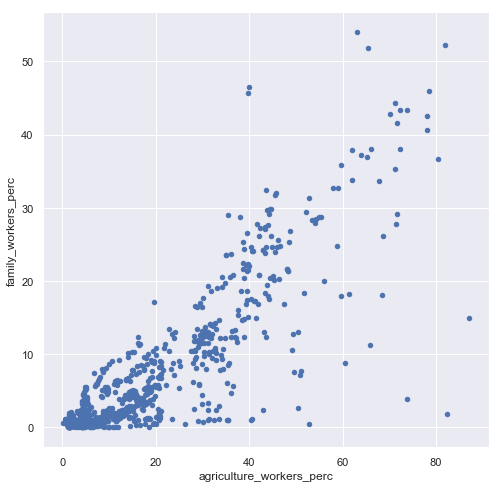

In [261]:
sector_and_status.plot(x='agriculture_workers_perc', y='family_workers_perc', kind='scatter', figsize=(6,6))

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


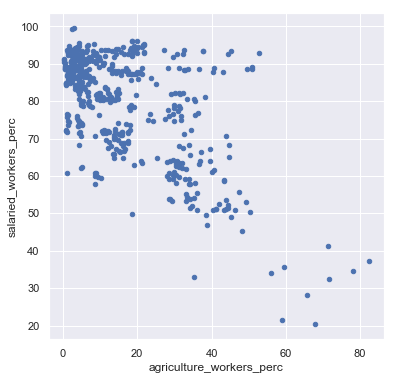

In [262]:
sector_and_status.plot(x='agriculture_workers_perc', y='salaried_workers_perc', kind='scatter', figsize=(6,6))

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


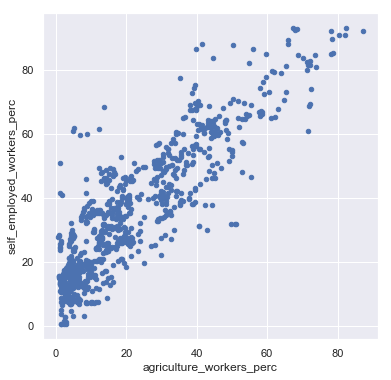

In [263]:
sector_and_status.plot(x='agriculture_workers_perc', y='self_employed_workers_perc', kind='scatter', figsize=(6,6))

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


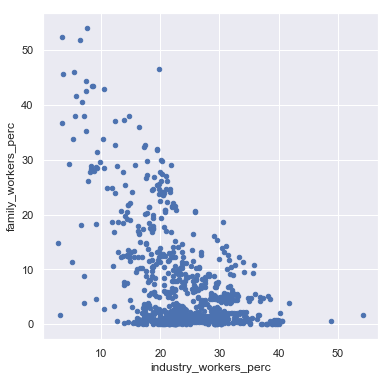

In [264]:
sector_and_status.plot(x='industry_workers_perc', y='family_workers_perc', kind='scatter', figsize=(6,6))

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


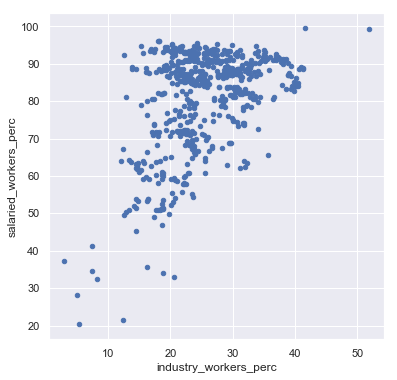

In [265]:
sector_and_status.plot(x='industry_workers_perc', y='salaried_workers_perc', kind='scatter', figsize=(6,6))

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


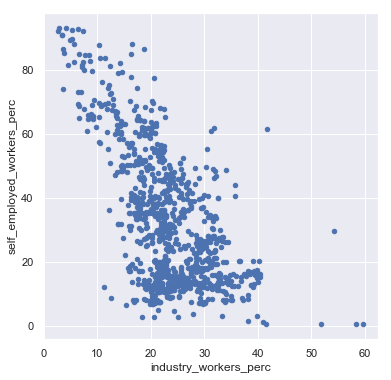

In [266]:
sector_and_status.plot(x='industry_workers_perc', y='self_employed_workers_perc', kind='scatter', figsize=(6,6))

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


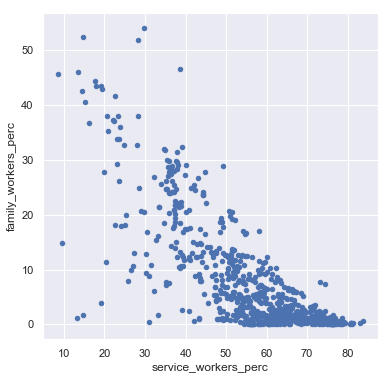

In [267]:
sector_and_status.plot(x='service_workers_perc', y='family_workers_perc', kind='scatter', figsize=(6,6))

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


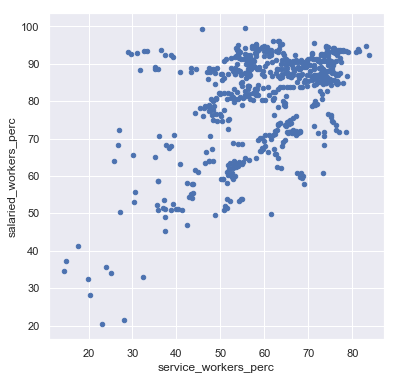

In [268]:
sector_and_status.plot(x='service_workers_perc', y='salaried_workers_perc', kind='scatter', figsize=(6,6))

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


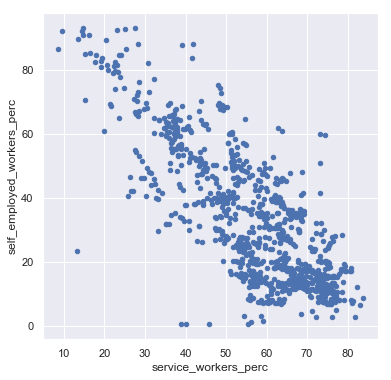

In [269]:
sector_and_status.plot(x='service_workers_perc', y='self_employed_workers_perc', kind='scatter', figsize=(6,6))

<a id='conclusions'></a>
## Conclusions

> **Tip**: Finally, summarize your findings and the results that have been performed. Make sure that you are clear with regards to the limitations of your exploration. If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

> **Tip**: Once you are satisfied with your work, you should save a copy of the report in HTML or PDF form via the **File** > **Download as** submenu. Before exporting your report, check over it to make sure that the flow of the report is complete. You should probably remove all of the "Tip" quotes like this one so that the presentation is as tidy as possible. Congratulations!